In [1012]:
import os
import re
import sys
import json
import pandas

In [1143]:
pd.set_option('display.max_columns', 1000)

In [1013]:
df = pd.read_json('data_raw/ceska_beletrie_raw.json')
df = df[df['041_ind1'] != 1]
df = df.reindex(sorted(df.columns), axis=1)
cizojazycne = df[(df['041_a'].notnull()) & (df['041_a'] != 'cze')]

C:\Users\micha\AppData\Local\Temp\ipykernel_13432\4060468971.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json('data_raw/ceska_beletrie_raw.json')
C:\Users\micha\AppData\Local\Temp\ipykernel_13432\4060468971.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json('data_raw/ceska_beletrie_raw.json')
C:\Users\micha\AppData\Local\Temp\ipykernel_13432\4060468971.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is depr

In [1014]:
sample = pd.read_json("data_raw/cnb_sample.json")

C:\Users\micha\AppData\Local\Temp\ipykernel_13432\2051427318.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sample = pd.read_json("data_raw/cnb_sample.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_13432\2051427318.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sample = pd.read_json("data_raw/cnb_sample.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_13432\2051427318.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. 

In [ ]:
len(sample)

In [1015]:
testy = pd.read_json("data_raw/testy.json")

C:\Users\micha\AppData\Local\Temp\ipykernel_13432\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  testy = pd.read_json("data_raw/testy.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_13432\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  testy = pd.read_json("data_raw/testy.json")
C:\Users\micha\AppData\Local\Temp\ipykernel_13432\3342864631.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future 

In [1016]:
len(df)

75337

In [1017]:
def najdi_rok(pole008, c260, c264):
    if " xr" in pole008:
        try:
            vysledek = int(pole008.split(' xr')[0].strip()[-4:])
            print(f"{pole008}, {vysledek}")
            return vysledek
        except:
            print(pole008)
    retezec = str([c260, c264])
    try:
        vysledek = int(re.search(r'\d{4}',retezec).group())
        print(f"{retezec}, {vysledek}")
        return vysledek
    except:
        return None

In [1018]:
df['rok'] = df.apply(lambda row: najdi_rok(row['008'], row['260_c'], row['264_c']), axis=1)

830321s1983    xr a         u0|0   cze, 1983
830405s1982    xr a          0|0 1 cze, 1982
830405s1982    xr a          0|0 1 cze, 1982
830224s1982    xr           u0|0 | cze, 1982
830211s1982    xr           u0|0 | cze, 1982
830401s1982    xr a         u0|0 | cze, 1982
830217s1983    xr           u0|0   cze, 1983
830217s1983    xr           u0|0   cze, 1983
830401s1982    xr a         u0|0   cze, 1982
830401s1983    xr a         u0|0 | cze, 1983
830219s1983    xr a          0|0 1 cze, 1983
830426s1982    xr a         u0|0   cze, 1982
830315s1982    xr a          0|0 1 cze, 1982
830225s1982    xr           u0|0   cze, 1982
830214s1982    xr a   e      000 1 cze, 1982
830406s1982    xr ac         000 1 cze, 1982
830331s1982    xr a          0|0 1 cze, 1982
830401s1982    xr     e |   u000 f cze, 1982
830211s1983    xr a   j |   u000 f cze, 1983
830223s1983    xr     e     u000 f cze, 1983
830218s1983    xr a   d     u000 f cze, 1983
830223s1982    xr a   j |   u0|0 f cze, 1982
830223s198

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [1019]:
df[(df['072_a'] == "821.162.3-3") & (df['rok'] == 2024) & ((df['250_a'].str.lower().str.contains('první',na=False)) | (df['250_a'].str.lower().str.contains('1. vyd',na=False)))][['100_a','245_a']]

100_a                                             245_a
72187       Ludvík, Ludvík      Moje bývalá, budoucí, nastávající minulost /
73680       Kohout, Pavel,                                    Taková láska :
74047     Glockner, David,                            Vraždy na Grabštejně /
74244               Eloise                                  Moderní gigolo /
74303       Klouda, Filip,                                 Neonová cizinka /
...                    ...                                               ...
76423        Pražák, Jiří,  Trampův deník: Konec srandy, potkal jsem dívku /
76427       Domská, Marie,                                Skryté ultimátum :
76428         Kausc, Emma,                                   Narušení děje /
76429     Šulcová, Helena,                             Samé dobré starosti /
76431  Christovová, Aneta,                          Deník tlustý kočičandy /

[366 rows x 2 columns]

<Axes: xlabel='rok'>

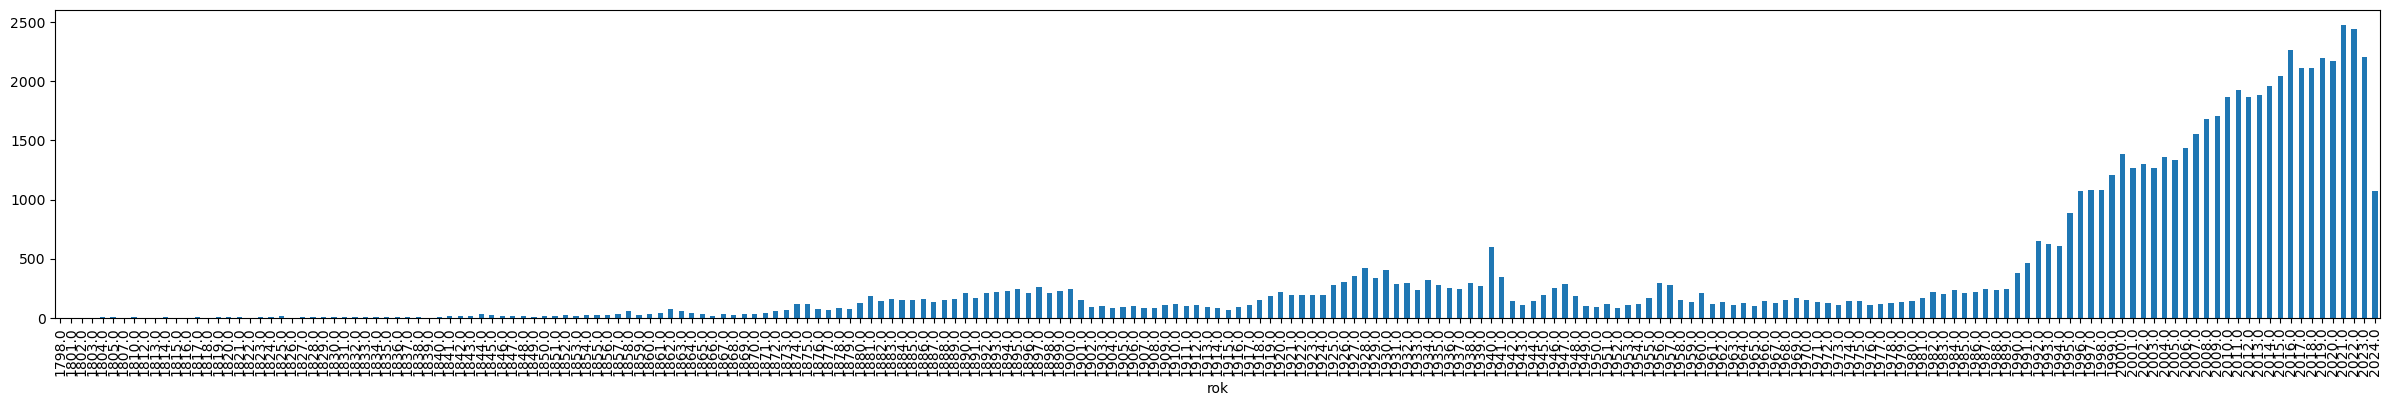

In [1020]:
df.groupby('rok').size().plot.bar(figsize=(30,4))

In [1021]:
len(df)

75337

In [1022]:
df['001'].nunique()

72866

In [1023]:
df['005'].nunique()

69351

In [1024]:
df['008'].nunique()

60342

In [1025]:
df.explode('035_a')['035_a'].nunique()

65092

In [1026]:
df['stránek'] = df['300_a'].apply(lambda x: re.search(r'\d{1,4}', str(x)).group(0) if re.search(r'\d{1,4}', str(x)) else None)
df['stránek'] = pd.to_numeric(df['stránek'])

In [1027]:
def count_unique_values(df):
    return df.nunique()

In [1028]:
samp_columns = sorted(sample.columns.to_list())

In [1029]:
kolik = {}
for s in samp_columns:
    print(s)
    kolik[s] = sample[s].astype(str).nunique()

001
003
005
006
007
008
010_a
015_a
015_z
020_a
020_c
020_q
020_z
022_a
022_ind1
022_y
022_z
024_2
024_a
024_c
024_ind1
024_ind2
024_q
024_z
028_a
028_b
028_ind1
028_ind2
028_q
034_a
034_b
034_d
034_e
034_f
034_g
034_ind1
035_a
040_9
040_a
040_b
040_c
040_d
040_e
041_a
041_b
041_d
041_e
041_f
041_g
041_h
041_ind1
041_k
043_2
043_a
043_b
044_a
045_a
047_a
048_a
048_b
072_2
072_9
072_a
072_ind2
072_x
080_2
080_a
080_ind1
080_x
100_4
100_7
100_a
100_b
100_c
100_d
100_ind1
100_q
110_4
110_7
110_a
110_b
110_c
110_d
110_ind1
110_n
111_4
111_7
111_a
111_c
111_d
111_e
111_ind1
111_n
130_7
130_a
130_d
130_ind1
130_k
130_l
130_n
130_p
130_s
210_a
210_b
210_ind1
222_a
222_b
222_ind2
240_7
240_a
240_f
240_g
240_ind1
240_ind2
240_k
240_l
240_m
240_n
240_o
240_p
240_r
240_s
242_a
242_b
242_ind1
242_ind2
242_y
245_a
245_b
245_c
245_f
245_h
245_ind1
245_ind2
245_n
245_p
246_a
246_b
246_f
246_i
246_ind1
246_ind2
246_n
246_p
247_a
247_b
247_f
247_ind1
247_ind2
247_x
250_a
250_b
254_a
255_a
255_b
255_c
2

In [1030]:
kolik_s = pd.Series(kolik)

In [1031]:
kolik_s.nlargest(40)

001      124000
015_a    124000
998_a    124000
245_a    112808
005      108496
008      104686
035_a     87213
245_c     85871
080_a     67461
245_b     52957
500_a     50104
100_a     49441
020_a     47879
100_7     45143
650_a     40956
650_7     38311
700_a     35743
700_7     31672
856_u     26628
260_b     24663
300_a     23491
246_a     22930
964_a     19426
490_a     16764
520_a     15309
830_a     14235
655_a     12898
700_d     12249
655_7     10704
490_v      9846
264_b      9599
765_t      8879
100_d      7030
710_7      7007
651_a      6549
240_a      6431
710_a      6357
260_f      5691
028_a      5655
245_p      5472
dtype: int64

In [1032]:
kolik_s.nsmallest(40)

003         1
010_a       2
022_ind1    2
024_2       2
024_ind2    2
040_9       2
040_b       2
043_2       2
080_ind1    2
080_x       2
130_k       2
130_n       2
240_f       2
240_g       2
242_ind2    2
242_y       2
245_f       2
247_x       2
255_d       2
340_2       2
340_a       2
344_b       2
380_a       2
382_r       2
382_t       2
384_a       2
500_0       2
500_ind2    2
506_a       2
507_a       2
510_a       2
533_a       2
534_c       2
547_a       2
563_5       2
588_5       2
600_l       2
600_x       2
610_k       2
610_z       2
dtype: int64

In [1033]:
len(sample)

124000

In [1034]:
kolik_s.to_json(os.path.join('data_raw','cnb_unikatni_hodnoty_ve_sloupcich.json'))

In [1087]:
sample[sample['245_b'].str.lower().str.contains("román",na=False)].sample(50)

001      003               005  007  \
44700       bk194400693  CZ PrNK  20070518123015.0  NaN   
47874       bk193902276  CZ PrNK  20110502111002.0  NaN   
28007       bk192905590  CZ PrNK  20190404235014.0   ta   
51199       bk193204745  CZ PrNK  19990915000000.0  NaN   
50864       bk192702078  CZ PrNK  20180511123227.0   ta   
114563   nkc20203240487  CZ PrNK  20240212091324.0   ta   
56265    cpk20021092319  CZ PrNK  20020715000000.0   tu   
51115       bk193301133  CZ PrNK  20100518145800.0  NaN   
32774       bk192601392  CZ PrNK  20150729095145.0  NaN   
48686    cpk20020889932  CZ PrNK  20040325185503.0   tu   
46194       bk192700712  CZ PrNK  20240521125143.0   ta   
33317      nos190120095  CZ PrNK  20110127144107.0  NaN   
37989       bk194801585  CZ PrNK  19980721000000.0  NaN   
47184       bk193400284  CZ PrNK  20110301075742.0   ta   
96708    cpk20132465691  CZ PrNK  20230523132840.0   ta   
41246       bk195702155  CZ PrNK  20240524174456.0  NaN   
50335     nos190256674b  CZ PrNK  20000920000000.0  NaN   
122412   cpk20243589457  CZ PrNK  20240214160622.0   ta   
44544       bk194401239  CZ PrNK  20080604135651.0  NaN   
120510   nkc20233535591  CZ PrNK  20240814133755.0   ta   
46652       bk193200536  CZ PrNK  20120521121848.0  NaN   
48936      nos190246663  CZ PrNK  20181120172519.0   ta   
46298       bk193300099  CZ PrNK  20070314171441.0  NaN   
10227    cpk19960138528  CZ PrNK  20190110104018.0   ta   
54384    bkn20011001165  CZ PrNK  20220719205356.0  NaN   
1458          ck8700968  CZ PrNK  20161025083553.0   ta   
57141       bknhak03304  CZ PrNK  20210106145445.0  NaN   
42131       bk193901626  CZ PrNK  20101029103522.0  NaN   
49531      nos190246885  CZ PrNK  20090910080513.0   ta   
30750      nos190101154  CZ PrNK  20180427235008.0  NaN   
84643    nkc20092026486  CZ PrNK  20200221114628.0   ta   
50194    cpk20000926791  CZ PrNK  20060318170314.0   tu   
42965      bk194200240a  CZ PrNK  19990126000000.0  NaN   
72699    cpk20061695057  CZ PrNK  20210708094605.0   ta   
51127       bk193204475  CZ PrNK  19990910000000.0  NaN   
42720       bk194200234  CZ PrNK  20210408100207.0  NaN   
39162       bk193502694  CZ PrNK  19990306000000.0   tu   
31560       bk193104036  CZ PrNK  20141121105042.0  NaN   
94833    nkc20122427139  CZ PrNK  20130205153734.0   ta   
49518    cpk20000885008  CZ PrNK  20110321141437.0   tu   
42251       bk193800655  CZ PrNK  20120829080042.0  NaN   
49464   nos190239415001  CZ PrNK  20211217121415.0   ta   
42431       bk193504578  CZ PrNK  20100810153519.0  NaN   
52710       bk194004582  CZ PrNK  20230331191706.0   tu   
71724    nkc20061652074  CZ PrNK  20061012092322.0   ta   
50013       bk193400779  CZ PrNK  20190326134834.0  NaN   
45227       bk194300343  CZ PrNK  20130521134325.0   ta   
50691       bk193402126  CZ PrNK  20240129235012.0  NaN   
59273       bknjas08697  CZ PrNK  20190509142910.0   ta   
123997   nkc20243592688  CZ PrNK  20240328131027.0   ta   

                                             008         015_a        020_q  \
44700     990205s1944    xr                  cze  cnb000762878          NaN   
47874     990423s1939    xr                  cze  cnb000804408          NaN   
28007     991110s1929    xr            000   cze  cnb000542970      (Brož.)   
51199     990915s1931    xr                  cze  cnb000939877          NaN   
50864     000115s1926    xr a   g      000 f cze  cnb000929925     (Vázáno)   
114563    200729s2020    xr     g      000 f cze  cnb003240487  (brožováno)   
56265     020402q18801900xr     e      000 1 cze  cnb001092319       (Váz.)   
51115     990719s1933    xr                  cze  cnb000940650          NaN   
32774     000613s1925    xr            ||| | cze  cnb000583814          NaN   
48686     011010s2001    xr     e      000 1 cze  cnb000889932     (váz.) :   
46194     000204s1926    xr af  g      000 f cze  cnb000788119  (Brožováno)   
33317     000228s1923    xr                  cze  cnb000576531

In [1088]:
df.sort_values(by='stránek',ascending=False).head(20)

001      003           005  006 007  \
31984  cpk20051526087  CZ PrNK  2.005041e+13  NaN  ta   
34444  nkc20061689218  CZ PrNK  2.006092e+13  NaN  ta   
68188  nkc20213344110  CZ PrNK  2.021113e+13  NaN  ta   
36909  nkc20071763965  CZ PrNK  2.011060e+13  NaN  ta   
61706  cpk20183060362  CZ PrNK  2.018121e+13  NaN  ta   
64221  nkc20193160915  CZ PrNK  2.020021e+13  NaN  ta   
19275  cpk20000962670  CZ PrNK  2.009122e+13  NaN  tu   
21368  cpk20011010224  CZ PrNK  2.002121e+13  NaN  tu   
33378  nkc20061638353  CZ PrNK  2.019011e+13  NaN  ta   
50522  nkc20142576374  CZ PrNK  2.014042e+13  NaN  ta   
17639  cpk20020888698  CZ PrNK  2.002072e+13  NaN  tu   
50260  nkc20142565330  CZ PrNK  2.014051e+13  NaN  ta   
76040  nkc20243609903  CZ PrNK  2.024090e+13  NaN  ta   
66459  nkc20203261849  CZ PrNK  2.022011e+13  NaN  ta   
64499  nkc20203166477  CZ PrNK  2.020062e+13  NaN  ta   
57340  nkc20172885602  CZ PrNK  2.017043e+13  NaN  ta   
54664  nkc20162777847  CZ PrNK  2.019013e+13  NaN  ta   
65174  nkc20203218390  CZ PrNK  2.021033e+13  NaN  ta   
29359  cpk20041296962  CZ PrNK  2.009120e+13  NaN  ta   
72018  nkc20223471001  CZ PrNK  2.023062e+13  NaN  ta   

                                            008 010_a         015_a 015_z  \
31984    050309s1875    xr     e      000 fbcze   NaN  cnb001526087   NaN   
34444    060913s1878    xr     e      000 f cze   NaN  cnb001689218   NaN   
68188    210721s2021    xr af  g      000 f cze   NaN  cnb003344110   NaN   
36909  071016s2007    xr     g      001 p cze d   NaN  cnb001763965   NaN   
61706    181205s1971    xr     e      000 | cze   NaN  cnb003060362   NaN   
64221    191122s2019    xr     e      001 mdcze   NaN  cnb003160915   NaN   
19275    000502s1999    xr     g      000 j cze   NaN  cnb000962670   NaN   
21368    010924s2001    xr     e      000 m cze   NaN  cnb001010224   NaN   
33378    060116s2005    xr     g      000 f cze   NaN  cnb001638353   NaN   
50522    140404s2014    xr a   g      001 f cze   NaN  cnb002576374   NaN   
17639    010620s2000    xr     e      000 p cze   NaN  cnb000888698   NaN   
50260    140211s2014    xr     g      001 f cze   NaN  cnb002565330   NaN   
76040    240606s2024    xr     g      000 f cze   NaN  cnb003609903   NaN   
66459    201030s2020    xr a   g      000 j cze   NaN  cnb003261849   NaN   
64499    200103s2019    xr a   g      000 mdcze   NaN  cnb003166477   NaN   
57340    170314s2016    xr     g      000 p cze   NaN  cnb002885602   NaN   
54664    160218s2015    xr ah  e      001 0dcze   NaN  cnb002777847   NaN   
65174    200918s2020    xr acfhe      001 m cze   NaN  cnb003218390   NaN   
29359    040226s2003    xr     e      000 p cze   NaN  cnb001296962   NaN   
72018    221104s2022    xr acf e      000 m cze   NaN  cnb003471001   NaN   

                                        020_a      020_c  \
31984                                     NaN        NaN   
34444                                     NaN        NaN   
68188                       978-80-7530-298-4        NaN   
36909                       978-80-7215-304-6        NaN   
61706                                     NaN  Kčs 11,00   
64221                       978-80-7215-587-3        NaN   
19275                           80-85844-62-1        NaN   
21368                           80-85844-75-3        NaN   
33378                           80-86337-53-7  Kč 555,00   
50522                       978-80-7387-738-5        NaN   
17639                           80-7215-124-X        NaN   
50260  [978-80-7387-732-3, 978-80-257-1041-8]        NaN   
76040                       978-80-206-2023-1  Kč 499,00   
66459                       978-80-88346-06-7  Kč 650,00   
64499                       978-80-257-3048-5        NaN   
57340                       978-80-7438-161-4        NaN   
54664                       978-80-7215-513-2        NaN   
65174                       978-80-200-3150-1        NaN   
29359                           80-86362-32-9        NaN   
72

<Axes: ylabel='Frequency'>

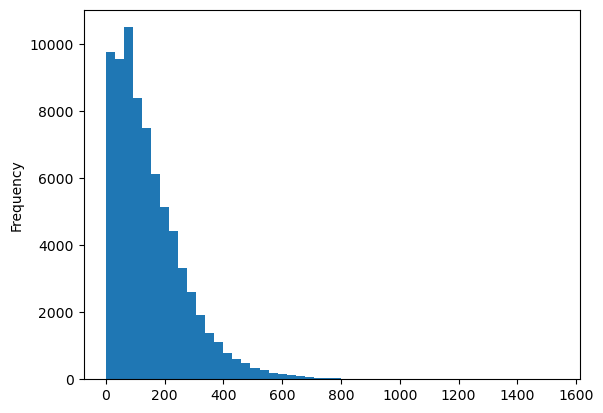

In [1089]:
df['stránek'].plot.hist(bins=50)

In [1090]:
df[(df['020_q'].str.lower().str.contains('váz',na=False)) | (df['020_q'].str.lower().str.contains('brož',na=False))]

001      003           005  006 007  \
0           ck8300396  CZ PrNK  2.011032e+13  NaN  tu   
1           ck8300397  CZ PrNK  2.019031e+13  NaN  tu   
2           ck8300397  CZ PrNK  2.019031e+13  NaN  tu   
4           ck8300399  CZ PrNK  2.013010e+13  NaN  ta   
5           ck8300400  CZ PrNK  2.013073e+13  NaN  ta   
...               ...      ...           ...  ...  ..   
76428  nkc20243629240  CZ PrNK  2.024091e+13  NaN  ta   
76429  nkc20243629265  CZ PrNK  2.024091e+13  NaN  ta   
76430  nkc20243629294  CZ PrNK  2.024091e+13  NaN  ta   
76431  nkc20243629295  CZ PrNK  2.024091e+13  NaN  ta   
76432  nkc20243631028  CZ PrNK  2.024091e+13  NaN  ta   

                                          008 010_a         015_a 015_z  \
0      830321s1983    xr a         u0|0   cze   NaN  cnb000000415   NaN   
1      830405s1982    xr a          0|0 1 cze   NaN  cnb000000416   NaN   
2      830405s1982    xr a          0|0 1 cze   NaN  cnb000000416   NaN   
4      830211s1982    xr           u0|0 | cze   NaN  cnb000000418   NaN   
5      830401s1982    xr a         u0|0 | cze   NaN  cnb000000419   NaN   
...                                       ...   ...           ...   ...   
76428  240904s2024    xr     g      000 f cze   NaN  cnb003629240   NaN   
76429  240905s2024    xr a   g      000 jacze   NaN  cnb003629265   NaN   
76430  240906s2024    xr a   a      000 j cze   NaN  cnb003629294   NaN   
76431  240906s2024    xr a   g      000 hdcze   NaN  cnb003629295   NaN   
76432  240909s2024    xr a   g      000 1 cze   NaN  cnb003631028   NaN   

                   020_a      020_c            020_q 020_z 022_a 022_z 024_a  \
0                    NaN  Kčs 13,00         (Váz.) :   NaN   NaN   NaN   NaN   
1                    NaN  Kčs 30,00  (Váz. v kůži) :   NaN   NaN   NaN   NaN   
2                    NaN  Kčs 30,00  (Váz. v kůži) :   NaN   NaN   NaN   NaN   
4                    NaN   5,00 Kčs        (Brož.) :   NaN   NaN   NaN   NaN   
5                    NaN     23 Kčs         (Váz.) :   NaN   NaN   NaN   NaN   
...                  ...        ...              ...   ...   ...   ...   ...   
76428  978-80-275-2196-8        NaN      (brožováno)   NaN   NaN   NaN   NaN   
76429  978-80-7683-603-7  Kč 349,00       (vázáno) :   NaN   NaN   NaN   NaN   
76430  978-80-00-07474-0  Kč 329,00       (vázáno) :   NaN   NaN   NaN   NaN   
76431  978-80-7683-605-1  Kč 369,00       (vázáno) :   NaN   NaN   NaN   NaN   
76432  978-80-7551-355-7        NaN      (brožováno)   NaN   NaN   NaN   NaN   

      024_ind1  024_ind2 024_q  024_z 028_a 028_b 028_ind1 028_ind2 028_q  \
0          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
1          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
2          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
4          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
5          NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
...        ...       ...   ...    ...   ...   ...      ...      ...   ...   
76428      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76429      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76430      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76431      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   
76432      NaN       NaN   NaN    NaN   NaN   NaN      NaN      NaN   NaN   

                 035_a  040_9   040_a 040_b   040_c   040_d 040_e 041_a 041_b  \
0       (OCoLC)9715869    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
1      (OCoLC)23564107    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
2      (OCoLC)23564107    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
4      (OCoLC)39567086    NaN  ABA001   cze     NaN  ABA001   NaN   NaN   NaN   
5      (OCoLC)10562431    NaN  ABA001   cze  ABA001  ABA001   NaN   NaN   NaN   
...                ...    ...     ...   ...     ...     ... 

In [1091]:
df.drop_duplicates(subset=['245_a'])

001      003           005  006 007  \
0           ck8300396  CZ PrNK  2.011032e+13  NaN  tu   
1           ck8300397  CZ PrNK  2.019031e+13  NaN  tu   
3           ck8300398  CZ PrNK  2.015102e+13  NaN  tu   
4           ck8300399  CZ PrNK  2.013010e+13  NaN  ta   
5           ck8300400  CZ PrNK  2.013073e+13  NaN  ta   
...               ...      ...           ...  ...  ..   
76427  nkc20243629208  CZ PrNK  2.024091e+13  NaN  ta   
76428  nkc20243629240  CZ PrNK  2.024091e+13  NaN  ta   
76429  nkc20243629265  CZ PrNK  2.024091e+13  NaN  ta   
76431  nkc20243629295  CZ PrNK  2.024091e+13  NaN  ta   
76432  nkc20243631028  CZ PrNK  2.024091e+13  NaN  ta   

                                          008 010_a         015_a  \
0      830321s1983    xr a         u0|0   cze   NaN  cnb000000415   
1      830405s1982    xr a          0|0 1 cze   NaN  cnb000000416   
3      830224s1982    xr           u0|0 | cze   NaN  cnb000000417   
4      830211s1982    xr           u0|0 | cze   NaN  cnb000000418   
5      830401s1982    xr a         u0|0 | cze   NaN  cnb000000419   
...                                       ...   ...           ...   
76427  240904s2024    xr     g      000 f cze   NaN  cnb003629208   
76428  240904s2024    xr     g      000 f cze   NaN  cnb003629240   
76429  240905s2024    xr a   g      000 jacze   NaN  cnb003629265   
76431  240906s2024    xr a   g      000 hdcze   NaN  cnb003629295   
76432  240909s2024    xr a   g      000 1 cze   NaN  cnb003631028   

              015_z              020_a      020_c            020_q 020_z  \
0               NaN                NaN  Kčs 13,00         (Váz.) :   NaN   
1               NaN                NaN  Kčs 30,00  (Váz. v kůži) :   NaN   
3      cnb000135396                NaN        NaN              NaN   NaN   
4               NaN                NaN   5,00 Kčs        (Brož.) :   NaN   
5               NaN                NaN     23 Kčs         (Váz.) :   NaN   
...             ...                ...        ...              ...   ...   
76427           NaN  978-80-275-2147-0        NaN      (brožováno)   NaN   
76428           NaN  978-80-275-2196-8        NaN      (brožováno)   NaN   
76429           NaN  978-80-7683-603-7  Kč 349,00       (vázáno) :   NaN   
76431           NaN  978-80-7683-605-1  Kč 369,00       (vázáno) :   NaN   
76432           NaN  978-80-7551-355-7        NaN      (brožováno)   NaN   

      022_a 022_z 024_a 024_ind1  024_ind2 024_q  024_z 028_a 028_b 028_ind1  \
0       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
1       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
3       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
4       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
5       NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
...     ...   ...   ...      ...       ...   ...    ...   ...   ...      ...   
76427   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76428   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76429   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76431   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
76432   NaN   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   

      028_ind2 028_q            035_a  040_9   040_a 040_b   040_c   040_d  \
0          NaN   NaN   (OCoLC)9715869    NaN  ABA001   cze     NaN  ABA001   
1          NaN   NaN  (OCoLC)23564107    NaN  ABA001   cze     NaN  ABA001   
3          NaN   NaN  (OCoLC)85541906    NaN  ABA001   cze     NaN  ABA001   
4          NaN   NaN  (OCoLC)39567086    NaN  ABA001   cze     NaN  ABA001   
5          NaN   NaN  (OCoLC)10562431    NaN  ABA001   cze  ABA001  ABA001   
...        ...   ...              ...    ...     ...   ...     ...     ...   
76427      NaN   NaN              NaN    NaN  ABG001   cze     NaN     NaN   
76428 

In [1092]:
df.groupby('rok').size().head(50)

rok
1798.0     1
1801.0     2
1802.0     2
1803.0     1
1804.0     4
1805.0     4
1807.0     1
1810.0     4
1812.0     2
1813.0     2
1814.0     4
1815.0     2
1816.0     3
1817.0     5
1818.0     3
1819.0     5
1820.0     4
1821.0     9
1822.0     3
1823.0    10
1824.0    12
1825.0    17
1826.0     3
1827.0     5
1828.0     5
1829.0     5
1830.0    12
1831.0     7
1832.0     4
1833.0     4
1834.0     8
1835.0    10
1836.0     8
1837.0     9
1838.0     8
1839.0     3
1840.0     6
1841.0    17
1842.0    13
1843.0    17
1844.0    37
1845.0    25
1846.0    20
1847.0    16
1848.0    13
1849.0    11
1850.0    15
1851.0    16
1852.0    21
1853.0    19
dtype: int64

In [1093]:
sample['020_q'].drop_duplicates().sample(50)

95082                                          (dvoulist) :
78224                              [(Zelený kruh ;, brož.)]
13253                                     [(sv. 2 ;, váz.)]
76422     [(Muzeum Jindřichohradecka ;, v knize neuveden...
99502     [(Scriptorium ;, váz.), (Archiv hl.m. Prahy ;,...
9719                       [(soubor), (2. část ;, brož.) :]
7229        [(Volvox Globator ;, váz.), (Panorama ;, váz.)]
69431     [(váz.) :, (dotisk 2012 ;, v knize neuvedeno ;...
55391     [(Správa Pražského hradu ;, soubor), (Správa P...
63218     [(Ústav mezinárodních vztahů ;, sv. 1 ;, váz.)...
111199    [(Host ;, vázáno), (Technické muzeum v Brně ;,...
97800                              [(Moravapress ;, brož.)]
5528      [(v knize neuvedeno ;, brož.), (dotisky ;, bro...
88103                                     (karty v krabici)
115812    [(NLN ;, vázáno), (Masarykův ústav a Archiv AV...
7958                                     [(soubor), (váz.)]
110414    [(učebnice ;, brožováno), (pra

In [1094]:
df.groupby('rok').size().tail(50)

rok
1975.0     147
1976.0     113
1977.0     121
1978.0     123
1979.0     133
1980.0     141
1981.0     166
1982.0     220
1983.0     206
1984.0     239
1985.0     211
1986.0     216
1987.0     241
1988.0     236
1989.0     246
1990.0     379
1991.0     461
1992.0     654
1993.0     624
1994.0     606
1995.0     887
1996.0    1074
1997.0    1082
1998.0    1085
1999.0    1211
2000.0    1386
2001.0    1269
2002.0    1301
2003.0    1271
2004.0    1364
2005.0    1334
2006.0    1437
2007.0    1557
2008.0    1684
2009.0    1703
2010.0    1869
2011.0    1925
2012.0    1871
2013.0    1884
2014.0    1960
2015.0    2045
2016.0    2262
2017.0    2114
2018.0    2109
2019.0    2193
2020.0    2172
2021.0    2479
2022.0    2439
2023.0    2205
2024.0    1073
dtype: int64

In [1095]:
sample.info

<bound method DataFrame.info of                    001      003               005       007  \
0            ck8404211  CZ PrNK  20050829100005.0        tu   
1            ck8401570  CZ PrNK  20081111141547.0        ta   
2            ck8301391  CZ PrNK  20121112083342.0        tu   
3            ck8305751  CZ PrNK  20220923151654.0        tu   
4            ck8701502  CZ PrNK  19940500000000.0        tu   
...                ...      ...               ...       ...   
123995  nkc20233566105  CZ PrNK  20240229081040.0     co cg   
123996  cpc20243598956  CZ PrNK  20240402160501.0  aj canzn   
123997  nkc20243592688  CZ PrNK  20240328131027.0        ta   
123998  nkc20243604002  CZ PrNK  20240724133942.0        ta   
123999  cpg20243606565  CZ PrNK  20240523132421.0     kp cc   

                                             008         015_a  \
0         841221s1984    xr           u0|0   cze  cnb000021599   
1         840611s1983    xr ae         000   cze  cnb000008959   
2         830

In [1096]:
kolik_zere = sample.memory_usage(index=True, deep=True)

In [1097]:
kolik_zere.nlargest()

245_c    18917817
245_a    18002454
998_a    14756000
520_a    14404254
245_b    14126144
dtype: int64

In [1098]:
sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124000 entries, 0 to 123999
Columns: 554 entries, 001 to 080_ind1
dtypes: float64(28), object(526)
memory usage: 2.3 GB


In [1099]:
sample['300_a'].info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 124000 entries, 0 to 123999
Series name: 300_a
Non-Null Count   Dtype 
--------------   ----- 
122697 non-null  object
dtypes: object(1)
memory usage: 8.0 MB


In [1100]:
sample['655_a'].info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 124000 entries, 0 to 123999
Series name: 655_a
Non-Null Count  Dtype 
--------------  ----- 
88527 non-null  object
dtypes: object(1)
memory usage: 9.6 MB


In [1101]:
sample['655_a'].info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 124000 entries, 0 to 123999
Series name: 655_a
Non-Null Count  Dtype 
--------------  ----- 
88527 non-null  object
dtypes: object(1)
memory usage: 9.6 MB


In [1102]:
kasparek

001      003             005         006             007  \
0  web20102087720  CZ PrNK  20111116125316  m        d           cr cn   
1  nkc20122386191  CZ PrNK  20180912104941         NaN              ta   
2  nkc20132497877  CZ PrNK  20140113125059         NaN              ta   
3  nkc20182997195  CZ PrNK  20190117132004         NaN              ta   
4  cpz20203171275  CZ PrNK  20200206110709         NaN  sd fungnnmmned   
5  nkc20233534156  CZ PrNK  20230904072450         NaN              ta   
6  nkc20233549616  CZ PrNK  20231030122624         NaN              ta   

                                      008         015_a   040_a 040_b  \
0  100301c20089999xr  x w s     0   b2eng  cnb002087720  ABA001   cze   
1  120716s2012    xr a   e f    001 0 cze  cnb002386191  OLA001   cze   
2  130911s2013    xr ac  e f    001 0 cze  cnb002497877  OLA001   cze   
3  180516s2018    xr     g      000 j cze  cnb002997195  OLA001   cze   
4  200115s2019    xr nnnng       f  n cze  cnb003171275  ABA001   cze   
5  230721s2023    xr a   e f    001 0 cze  cnb003534156  BOA001   cze   
6  230925s2023    xr     g      000 f cze  cnb003549616  ABG001   cze   

     043_a    043_b   043_2 072_ind2               072_a  \
0  e-xr---  e-xr-jm  czenas   [7, 9]  [913(437), 914.37]   
1      NaN      NaN     NaN        7              159.95   
2      NaN      NaN     NaN        7                 005   
3      NaN      NaN     NaN        7         821.162.3-3   
4      NaN      NaN     NaN        7         821.162.3-3   
5      NaN      NaN     NaN        7              159.95   
6      NaN      NaN     NaN        7         821.162.3-3   

                                               072_x                   072_2  \
0  [Geografie Česka a Slovenska, reálie, cestován...  [Konspekt, Conspectus]   
1                              Vyšší duševní procesy                Konspekt   
2                                 Management. Řízení                Konspekt   
3                                        Česká próza                Konspekt   
4                                        Česká próza                Konspekt   
5                              Vyšší duševní procesy                Konspekt   
6                                        Česká próza                Konspekt   

    072_9                                              080_a  \
0  [7, 7]  [913:338.483.1, 904:338.483.12, (437.322), (0....   
1      17  [159.95:003.63, 159.954/.955, 159.953, 159.923...   
2       4  [005, 658.114, 159.95:003.63, 159.954/.955, 65...   
3      25                       [821.162.3-32, (0:82-323.1)]   
4      25  [821.162.3-32, (0:82-323.1), (086.7)08, (086.76)]   
5      17  [159.95:003.63, 159.954/.955, 159.953, 159.923...   
6      25                          [821.162.3-31, (0:82-31)]   

                            080_2  100_ind1              100_a  100_d  \
0            [MRF, MRF, MRF, MRF]         1  Kašpárek, Michal,  1984-   
1  [MRF, MRF, MRF, MRF, MRF, MRF]         1       Buzan, Tony,  1942-   
2  [MRF, MRF, MRF, MRF, MRF, MRF]         1       Buzan, Tony,  1942-   
3                      [MRF, MRF]         1  Kašpárek, Michal,  1984-   
4            [MRF, MRF, MRF, MRF]         1  Kašpárek, Michal,  1984-   
5  [MRF, MRF, MRF, MRF, MRF, MRF]         1       Buzan, Tony,  1942-   
6                      [MRF, MRF]         1  Kašpárek, Michal,  1984-   

           100_7       100_4  245_ind1  245_ind2                        245_a  \
0  jx20100301005  [aut, pbl]         1         0                     Brno Now   
1  jn19990001255         aut         1         0            Myšlenkové mapy :   
2  jn19990001255         aut         1         0  Myšlenkové mapy v byznysu :   
3  jx20100301005         aut         1         0             Hry bez hranic /   
4  jx20100301005         aut         1         0             Hry bez hranic /   
5  jn19990001255         aut         1         0            Myšlenkové mapy :   
6  jx20100301005         aut         1         0 

In [1103]:
df[df['080_a'] == '885.0-32']

001      003           005  006  007  \
37          ck8300922  CZ PrNK  2.015021e+13  NaN   tu   
57          ck8301406  CZ PrNK  2.009043e+13  NaN   ta   
58          ck8301414  CZ PrNK  2.016102e+13  NaN   tu   
114         ck8302430  CZ PrNK  2.008093e+13  NaN   ta   
278         ck8402094  CZ PrNK  2.015022e+13  NaN   tu   
...               ...      ...           ...  ...  ...   
50484  cpk20142574890  CZ PrNK  2.023120e+13  NaN   ta   
53283  nkc20152719169  CZ PrNK  2.021031e+13  NaN  NaN   
64073  nkc20193158491  CZ PrNK  2.020041e+13  NaN   ta   
73191  cpk20233517780  CZ PrNK  2.023043e+13  NaN   ta   
75223  cpk20243586986  CZ PrNK  2.024020e+13  NaN   ta   

                                          008 010_a         015_a  \
37     830322s1982    xr            0|0 1 cze   NaN  cnb000000940   
57     830321s1983    xr            000 1 cze   NaN  cnb000001425   
58     830613s1982    xr            0|0 1 cze   NaN  cnb000001433   
114    830321s1983    xr           u0|0   cze   NaN  cnb000002449   
278    840608s1984    xr a          0|0 1 cze   NaN  cnb000009483   
...                                       ...   ...           ...   
50484  140319m19231924xr            ||| | cze   NaN  cnb002574890   
53283  010713s1999    xr a          000 0 cze   NaN  cnb002719169   
64073  100611s2008    xr     g      000 j cze   NaN  cnb003158491   
73191  970527s1931    xr     e      000 j cze   NaN  cnb003517780   
75223  041208s2001    xr ag  g      000 j cze   NaN  cnb003586986   

                                                   015_z              020_a  \
37                                                   NaN                NaN   
57                                                   NaN                NaN   
58                                          cnb000128502                NaN   
114                                                  NaN                NaN   
278                                                  NaN                NaN   
...                                                  ...                ...   
50484  [cnb000987021, cnb000987017, cnb001039692, cnb...                NaN   
53283                                                NaN      80-267-0482-7   
64073                                                NaN  978-80-86811-93-2   
73191         [cnb000167691, cnb000550270, cnb000550271]                NaN   
75223                                                NaN                NaN   

           020_c                               020_q          020_z 022_a  \
37     Kčs 18,00                            (Váz.) :            NaN   NaN   
57     Kčs 18,00                            (Váz.) :            NaN   NaN   
58     Kčs 13,00                            (Váz.) :            NaN   NaN   
114    Kčs 19,00                            (Váz.) :            NaN   NaN   
278    Kčs 22,00                            (Váz.) :            NaN   NaN   
...          ...                                 ...            ...   ...   
50484        NaN                                 NaN            NaN   NaN   
53283        NaN       [(v knize neuvedeno ;, váz.)]  80-85872-30-7   NaN   
64073        NaN  [(v knize neuvedeno ;, brožováno)]  80-86811-74-3   NaN   
73191        NaN                              (Váz.)            NaN   NaN   
75223        NaN                              (Váz.)            NaN   NaN   

      022_z 024_a 024_ind1  024_ind2 024_q  024_z 028_a 028_b 028_ind1  \
37      NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
57      NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
58      NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
114     NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
278     NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
...     ...   ...      ...       ...   ...    ...   ...   ...      ...   
50484   NaN   NaN      NaN       NaN   NaN    NaN   NaN   NaN      NaN   
53283   NaN   NaN      NaN

In [1104]:
vsechny_kody = df[['080_a','100_a','245_a']].explode('080_a')

In [1105]:
vsechny_kody.groupby('080_a').size().nlargest(50)

080_a
821.162.3-32       22409
821.162.3-1        19072
821.162.3-31       17082
821-93             12859
(0:82-32)          12617
(0:82-1)           12607
(0:82-31)           6800
821.162.3-3         6701
821.162.3-34        4788
(0:82-3)            3851
(0:82-34)           3470
(437.3)             3058
885.0-1             3005
82-93               2736
929                 2661
(0:82-311.6)        2506
(0:82-312.4)        1974
(0:82-322.4)        1931
(082.21)            1898
(086.76)            1800
(0:82-321.5)        1469
(0:82-4)            1335
(0:82-322.6)        1308
(0.027.6)           1135
885.0-32            1122
885.0-31            1113
(0:82-312.9)        1096
(086.7)08            968
(0:82-321.6)         965
(0:82-193)           823
(086.7.053.2)        771
(0:82-14)            752
(0:82-311.9)         691
(0:82-94)            664
(0:82-311.5)         633
(082)                629
821.162.3-051        626
821.162.3-1-051      619
(0:82-312.6)         588
(0:82-311.3)       

In [1106]:
vsechny_kody = df[['080_a',]]

In [1107]:
testy['080_a'].astype(str)

0                               ['885.0-252', '885.0-93']
1                                ['885.0-93', '885.0-34']
2               ['821.162.3-32', '(0:82-32)', '(082.21)']
3                                        830(437.1/.2)-32
4                                ['885.0-34', '885.0-93']
                              ...                        
2119                 ['821.112.2(437.3)-32', '(0:82-32)']
2120                 ['821.112.2(437.3)-32', '(0:82-32)']
2121    ['821.112.2(437.3)-051', '913:82', '929', '(43...
2122    ['821.162.3-34', '821-1/-8(0.046.6)', '(0:82-3...
2123                                     830(437.1/.2)-31
Name: 080_a, Length: 2124, dtype: object

In [1108]:
len(df)

75337

In [1110]:
len(df)

72866

In [1111]:
df['041_ind1'].drop_duplicates()

0      NaN
105    0.0
Name: 041_ind1, dtype: float64

In [1112]:
df['072_x'].drop_duplicates().sample(50)

23247                   [Česká próza, Tisky (19. století)]
3831     [Historická věda. Pomocné vědy historické. Arc...
13586                           [Psychiatrie, Česká próza]
8758     [Praktická teologie. Morální teologie, Literat...
35962             [Film. Cirkus. Lidová zábava, Biografie]
29257        Literární slovníky, encyklopedie. Konkordance
22726                         [Paleontologie, Česká próza]
6339       Milostná, dobrodružná, fantastická próza (o ní)
19234    [Zoologie, Literatura pro děti a mládež (belet...
42614    [Česká poezie, Náboženská literatura. Duchovní...
49868    Křesťanská sdružení, spolky a organizace. Řeho...
28461              [Dějiny Česka a Slovenska, Česká próza]
15163                             Polská literatura (o ní)
18       [Česká próza, Literatura pro děti a mládež (be...
40902    [Noviny. Tisk. Žurnalistika, Bibliografie. Kat...
38877                           [Vokální hudba, Biografie]
30084     [Čeština, Literatura pro děti a mládež (naučná

In [1113]:
df['072_a'].drop_duplicates()

0                                  NaN
1                          821.162.3-1
14                         821.162.3-3
18               [821.162.3-3, 821-93]
23                         821.162.3-2
                     ...              
75157                         [82, 37]
75252                       [614, 929]
75442                [821.162.3-1, 73]
76251                    [792, 821-93]
76411    [741.52, 821.162.3-3, 821-93]
Name: 072_a, Length: 512, dtype: object

In [1114]:
df[df['245_a'].str.contains('Miluji svou',na=False)][['rok','100_a','245_a']]

rok          100_a                                      245_a
59406  2017.0  Macl, Ondřej,  Miluji svou babičku víc než mladé dívky /

In [1115]:
testy.sample(30)

001      003           005             007  \
227    cpz19980303667  CZ PrNK  2.006023e+13  ss lsnjlcmpnzu   
76          np9319778  CZ PrNK  2.006063e+13              ta   
63          np9305771  CZ PrNK  2.003042e+13              tu   
1640   nkc20081813751  CZ PrNK  2.011062e+13              ta   
708   nos190131988001  CZ PrNK  2.005101e+13             NaN   
1408   cpk20031284813  CZ PrNK  2.023101e+13              tu   
1254   cpz20021036110  CZ PrNK  2.006110e+13  ss lsnjlcmpnzu   
431       bk195101020  CZ PrNK  2.015072e+13             NaN   
643   nos190131928002  CZ PrNK  2.000052e+13             NaN   
831       bk195001923  CZ PrNK  2.011022e+13             NaN   
222    cpk19980295164  CZ PrNK  2.008092e+13              ta   
1740   nkc20112195208  CZ PrNK  2.018053e+13              ta   
1357      bknhak09033  CZ PrNK  2.020072e+13             NaN   
319       bk195404624  CZ PrNK  2.015081e+13              ta   
1874   nkc20162836881  CZ PrNK  2.019010e+13              ta   
1574   nkc20071751211  CZ PrNK  2.024083e+13              ta   
1283       gk00100161  CZ PrNK  2.019082e+13             NaN   
789    cpz19990648199  CZ PrNK  2.000031e+13  ss lsnjlcmpnzu   
1440   cpk20041312341  CZ PrNK  2.023043e+13              ta   
1295   cpk20031179863  CZ PrNK  2.003033e+13              tu   
978       bk194102364  CZ PrNK  2.019103e+13             NaN   
521       bk193002361  CZ PrNK  2.022062e+13             NaN   
1900   nkc20172894959  CZ PrNK  2.018021e+13              ta   
120    cpk19950113089  CZ PrNK  2.011121e+13              tu   
1186      bk194004247  CZ PrNK  2.023021e+13             NaN   
1180      bk193403482  CZ PrNK  1.999091e+13             NaN   
384       bk197503003  CZ PrNK  2.023113e+13              ta   
308       bk195403889  CZ PrNK  2.016061e+13             NaN   
1178      bk193403479  CZ PrNK  1.999091e+13             NaN   
1785   nkc20132461447  CZ PrNK  2.014011e+13              ta   

                                         008         015_a  \
227   980313s1997    xr nnn j z     z    cze  cnb000303667   
76    940418s1993    xr acfhe      000 0dcze  cnb000080456   
63    940120s1992    xr a   j     u0|0 1 cze  cnb000072168   
1640  080822s2008    xr a   e      000 0beng  cnb001813751   
708   000517s1906    xr                1 cze  cnb000632727   
1408  031121s2003    xr     e      000 m cze  cnb001284813   
1254  020215s2001    xr nnn j       z    cze  cnb001036110   
431   980202s1951    xr            ||| 1 cze  cnb000502704   
643   000516s1925    xr                  cze  cnb000632652   
831   980824s1950    xr                1 cze  cnb000677224   
222   980120s1895    xr a   e      000 1 cze  cnb000295164   
1740  110603s2011    xr a   b      000 j cze  cnb002195208   
1357  030517s1917    xr     f      ||| 1 cze  cnb001261501   
319   980610s1954    xr af         000 1 cze  cnb000433486   
1874  161005s1940    xr a   g      000 j cze  cnb002836881   
1574  071024s1939    xr a   g      000 f cze  cnb001751211   
1283  000227s1954    xr     f      ||| 0 cze  cnb001157764   
789   000307p19981997xr nnn j       z    cze  cnb000648199   
1440  040419m20032007xr abcee      001 0acze  cnb001312341   
1295  030320s2002    xr     e      000 j cze  cnb001179863   
978   990310s1941    xr f   e      000 m cze  cnb000756352   
521   000104s1929    xr            ||| | cze  cnb000545264   
1900  170511s2016    xr a   b      000 j cze  cnb002894959   
120   960430s1995    xr a   a      000 f cze  cnb000113089   
1186  990714s1940    xr     e      ||| 0 cze  cnb000956673   
1180  990906s1934    xr                  cze  cnb000945745   
384   970415s1975    xr            000 1 cze  cnb000468719   
308   980522s1954    xr            ||| | cze  cnb000428391   
1178  990906s1934    xr                  cze  cnb000945742   
1785  130429s2013    xr a   a      000 f cze  cnb002461447   

                                                  020_q  \
227                                                

In [1116]:
testy.iloc[[7]]['080_a']

7    [821.162.4-34, 821-93, (0:82-34)]
Name: 080_a, dtype: object

In [1117]:
sample.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124000 entries, 0 to 123999
Columns: 554 entries, 001 to 080_ind1
dtypes: float64(28), object(526)
memory usage: 524.1+ MB


In [1118]:
sample = sample.reindex(sorted(df.columns), axis=1)

In [1119]:
sample[sample['041_ind1'] == 1]

001      003               005  006 007  \
10           ck8304153  CZ PrNK  20161013093021.0  NaN  tu   
11           ck8400892  CZ PrNK  20220712101141.0  NaN  ta   
17           ck8403470  CZ PrNK  20140220124905.0  NaN  tu   
21           ck8401315  CZ PrNK  19940500000000.0  NaN  tu   
25           ck8400694  CZ PrNK  20130610142436.0  NaN  tu   
...                ...      ...               ...  ...  ..   
123977  nkc20243603969  CZ PrNK  20240808141231.0  NaN  ta   
123983  nkc20243605484  CZ PrNK  20240531080205.0  NaN  ta   
123989  nkc20243602670  CZ PrNK  20240828091905.0  NaN  ta   
123991  nkc20243591669  CZ PrNK  20240321151741.0  NaN  ta   
123997  nkc20243592688  CZ PrNK  20240328131027.0  NaN  ta   

                                             008 010_a         015_a 015_z  \
10        831205s1983    xr     e |   u00| 0 spa   NaN  cnb000004172   NaN   
11        840502s1983    xr a   j     u000 1 cze   NaN  cnb000008281   NaN   
17        840705s1984    xr           u0|0 | cze   NaN  cnb000020858   NaN   
21        840530s1984    xr a         u0|0   cze   NaN  cnb000008704   NaN   
25        840426s1984    xr a         u0|1 | cze   NaN  cnb000008083   NaN   
...                                          ...   ...           ...   ...   
123977  240408s2024    xr a   c f    000 0 cze d   NaN  cnb003603969   NaN   
123983    240510s2024    xr a   a      000 p cze   NaN  cnb003605484   NaN   
123989    240422m20199999xr acf e f    000 0 eng   NaN  cnb003602670   NaN   
123991    240229s2024    xr a   b      000 j cze   NaN  cnb003591669   NaN   
123997    240305s2024    xr a   d 6    000 1 cze   NaN  cnb003592688   NaN   

                    020_a                  020_c  \
10                    NaN                    NaN   
11                    NaN              Kčs 25,00   
17                    NaN              Kčs 12,00   
21                    NaN  14 Kčs (10 Kčs brož.)   
25                    NaN  23 Kčs (17 Kčs brož.)   
...                   ...                    ...   
123977  978-80-7541-368-0                    NaN   
123983  978-80-00-07364-4              Kč 269,00   
123989  978-80-906787-2-9                    NaN   
123991  978-80-204-6280-0              Kč 299,00   
123997  978-80-7683-475-0                    NaN   

                                           020_q 020_z 022_a 022_z 024_a  \
10                                       (Brož.)   NaN   NaN   NaN   NaN   
11                                      (Váz.) :   NaN   NaN   NaN   NaN   
17                                     (Brož.) :   NaN   NaN   NaN   NaN   
21                                      (Váz.) :   NaN   NaN   NaN   NaN   
25                                      (Váz.) :   NaN   NaN   NaN   NaN   
...                                          ...   ...   ...   ...   ...   
123977                               (brožováno)   NaN   NaN   NaN   NaN   
123983                                (vázáno) :   NaN   NaN   NaN   NaN   
123989  [(I. ;, v knize neuvedeno ;, brožováno)]   NaN   NaN   NaN   NaN   
123991                                (vázáno) :   NaN   NaN   NaN   NaN   
123997                               (brožováno)   NaN   NaN   NaN   NaN   

       024_ind1  024_ind2 024_q 024_z 028_a 028_b 028_ind1 028_ind2 028_q  \
10          NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
11          NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
17          NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
21          NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
25          NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
...         ...       ...   ...   ...   ...   ...      ...      ...   ...   
123977      NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
123983      NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
123989      NaN       NaN   NaN   NaN   NaN   NaN      NaN      NaN   NaN   
123991      NaN       NaN   N

In [1120]:
sample[(sample['245_a'].str.lower().str.contains('č')) & (sample['245_c'].str.lower().str.contains('ä'))].sample(50)

001      003               005  006       007  \
97322   nkc20132508833  CZ PrNK  20220922151253.0  NaN        ta   
58400      bknjje05679  CZ PrNK  20080229111843.0  NaN        ta   
2756         ck8904569  CZ PrNK  20230411145220.0  NaN        ta   
111801  nkc20183018870  CZ PrNK  20180830112846.0  NaN        ta   
120148  cpc20233526943  CZ PrNK  20230626155531.0  NaN  aj banzn   
56660      bknzdr06445  CZ PrNK  20200830145125.0  NaN       NaN   
18299      bk197702561  CZ PrNK  20121115143113.0  NaN       NaN   
94573   cpc20122432162  CZ PrNK  20121211082659.0  NaN  aj canzn   
88488   nkc20102130379  CZ PrNK  20101108143059.0  NaN        ta   
5904         ck9001392  CZ PrNK  20100630152715.0  NaN        tu   
89637   nkc20102151629  CZ PrNK  20240116095455.0  NaN        ta   
75221   nkc20081745486  CZ PrNK  20230529094054.0  NaN        ta   
110150  nkc20193084414  CZ PrNK  20191025085341.0  NaN        ta   
34941     nos190150823  CZ PrNK  20210921134946.0  NaN        ta   
53273      bk193805673  CZ PrNK  20110324155946.0  NaN        ta   
16267      bk194603376  CZ PrNK  20080417142551.0  NaN        ta   
46634      bk193902745  CZ PrNK  20090702095650.0  NaN       NaN   
70954   nkc20061656794  CZ PrNK  20061025093108.0  NaN        ta   
10943      bk197304495  CZ PrNK  20080520150107.0  NaN        ta   
122265  cpc20243591689  CZ PrNK  20240227105236.0  NaN  aj canzn   
64176   cpk20041315264  CZ PrNK  20090909162132.0  NaN        tu   
29997      bk196101784  CZ PrNK  20180816075940.0  NaN       NaN   
101337  nkc20142628065  CZ PrNK  20141112063119.0  NaN        ta   
52093      bk193805821  CZ PrNK  20240305192913.0  NaN       NaN   
114923  nkc20203241739  CZ PrNK  20210203105547.0  NaN        ta   
42543      bk193601666  CZ PrNK  20211213104831.0  NaN        ta   
2569         ck8800377  CZ PrNK  19940500000000.0  NaN        tu   
98115   nkc20142573183  CZ PrNK  20140718080038.0  NaN        ta   
105557  nkc20162785492  CZ PrNK  20160408094246.0  NaN        ta   
95980   cpg20122392668  CZ PrNK  20121219110001.0  NaN     kf co   
6266         np9307134  CZ PrNK  20101208090605.0  NaN        ta   
80184      hud03100661  CZ PrNK  20240729103408.0  NaN        qu   
121201  cpk20233518294  CZ PrNK  20230518121006.0  NaN        ta   
74949   nkc20081795797  CZ PrNK  20170407155405.0  NaN        ta   
116957  nkc20213351360  CZ PrNK  20240318082654.0  NaN        ta   
42715      bk194102909  CZ PrNK  20090213162350.0  NaN       NaN   
87492   nkc20102118634  CZ PrNK  20120718135043.0  NaN        ta   
110603  cpk20183049706  CZ PrNK  20181102114312.0  NaN        ta   
87556   nkc20102126808  CZ PrNK  20120313125831.0  NaN        ta   
24071      bk196402359  CZ PrNK  19971106000000.0  NaN       NaN   
60026   cpk20031240118  CZ PrNK  20140902103202.0  NaN        tu   
53885     bk193707434a  CZ PrNK  20240621114046.0  NaN       NaN   
52568   cpk20010983645  CZ PrNK  20100310130356.0  NaN        tu   
81368      hud02400646  CZ PrNK  20211013124645.0  NaN        qu   
26332      bk195800196  CZ PrNK  20080516085754.0  NaN        ta   
79954      hud01700054  CZ PrNK  20200605085158.0  NaN        qu   
11750      bk196903805  CZ PrNK  19971025000000.0  NaN       NaN   
92197   nkc20112257107  CZ PrNK  20231024140651.0  NaN        ta   
123958  cpc20243586539  CZ PrNK  20240205101222.0  NaN  aj canzn   
113549  nkc20193093558  CZ PrNK  20191114074517.0  NaN        ta   

                                             008 010_a         015_a  \
97322     140211s2014    xr a   a      000 0 cze   NaN  cnb002508833   
58400     020418q18841891xr a   d      000 1 cze   NaN  cnb001132100   
2756      890905s1989    xr     e      000 j cze   NaN  cnb000047296   
111801    180803s2018    xr     g      000 f cze   NaN  cnb003018870   
120148  130422s1928    xr        a     0   cze d   NaN  cnb003526943   
56660     011229s1979    xr     e b    ||| 0 cze   NaN  cnb001080333   
18299     970407s1976    xr            ||| | c

In [1121]:
sample.sample(50)

001      003               005  006             007  \
108898  nkc20183000176  CZ PrNK  20200908103909.0  NaN              ta   
116494  nkc20213340799  CZ PrNK  20210903115456.0  NaN              ta   
88679   cpg20112161435  CZ PrNK  20110307183734.0  NaN           kf co   
41223      bk193504084  CZ PrNK  20190611082658.0  NaN             NaN   
24524      bk196600754  CZ PrNK  20200305150009.0  NaN              ta   
87599   nkc20102109029  CZ PrNK  20101101064414.0  NaN              ta   
45949      bk194301336  CZ PrNK  20100528115204.0  NaN              ta   
116919  nkc20213376318  CZ PrNK  20220804131823.0  NaN              ta   
83858      hud07800044  CZ PrNK  20110118130230.0  NaN              qu   
24764      bk196001510  CZ PrNK  20230627114336.0  NaN             NaN   
90034   nkc20112226441  CZ PrNK  20111123085634.0  NaN              ta   
13579   cpg19960165271  CZ PrNK  19980116000000.0  NaN           kf co   
7478         np9306081  CZ PrNK  19941214000000.0  NaN              tu   
104504  nkc20162776850  CZ PrNK  20190220235012.0  NaN              ta   
10248      bk197800485  CZ PrNK  20240628104500.0  NaN              ta   
61072   cpk20021196924  CZ PrNK  20030505084815.0  NaN              tu   
93517   nkc20122371249  CZ PrNK  20141017075103.0  NaN              ta   
37261      bk194502052  CZ PrNK  20100420134801.0  NaN             NaN   
85969   nkc20102029608  CZ PrNK  20160504094613.0  NaN              ta   
110896  cpg20183010617  CZ PrNK  20180813142722.0  NaN           kp cc   
72832   nkc20061703336  CZ PrNK  20120404133846.0  NaN              ta   
68559   nkc20051634200  CZ PrNK  20240108091632.0  NaN              ta   
112595  nkc20193162553  CZ PrNK  20200303101929.0  NaN              ta   
80561      hud07800116  CZ PrNK  20090417223501.0  NaN              qu   
10431      bk197704658  CZ PrNK  20050922155719.0  NaN              ta   
10381      bk19821777d  CZ PrNK  19960126000000.0  NaN             NaN   
85286   nkc20092024286  CZ PrNK  20100518064650.0  NaN              ta   
71877   nkc20061643287  CZ PrNK  20161129151848.0  NaN              ta   
5892         ck9101264  CZ PrNK  20121026122951.0  NaN              tu   
25725      bk196301665  CZ PrNK  20050815143206.0  NaN             NaN   
24389      bk196500605  CZ PrNK  19970723000000.0  NaN             NaN   
103546  nkc20152721027  CZ PrNK  20160901141845.0  NaN              ta   
28559      bk195901956  CZ PrNK  20171110101052.0  NaN             NaN   
121706  cpz20233520190  CZ PrNK  20230526143938.0  NaN  sd fungnnmmned   
102923  nkc20152703857  CZ PrNK  20180612162107.0  NaN              ta   
2652         ck8702218  CZ PrNK  20121031142724.0  NaN              ta   
17626      bk198101053  CZ PrNK  20080317093736.0  NaN             NaN   
61580      bknmik09016  CZ PrNK  20180904185848.0  NaN             NaN   
121513  cph20233527537  CZ PrNK  20230627112323.0  NaN              qu   
105958  cpk20162794340  CZ PrNK  20160425154225.0  NaN             NaN   
11164      bk198003876  CZ PrNK  20120319090810.0  NaN             NaN   
20245      bk195403948  CZ PrNK  20140328084727.0  NaN             NaN   
72079   nkc20071722325  CZ PrNK  20080505100306.0  NaN              ta   
109436  cps20182984568  CZ PrNK  20210106164325.0  NaN              ta   
1932         ck8400955  CZ PrNK  20180312140649.0  NaN              tu   
29285      bk192905028  CZ PrNK  19991018000000.0  NaN             NaN   
97209   cps20132508210  CZ PrNK  20131018154150.0  NaN             NaN   
36989      bk194902123  CZ PrNK  20230203235008.0  NaN              ta   
17805   cps19950356547  CZ PrNK  20190506164124.0  NaN              ta   
14679   cpg19980295789  CZ PrNK  19980603000000.0  NaN           kf co   

                                             008 010_a         015_a  \
108898  170208s2018    xr     e      000 fbcze d   NaN  cnb003000176   
116494    210708s2021    xr a   e p    000 0 cze   NaN  cnb003340799   
88679     110117s2010    xr 